# Iris dataset analysis


In the present analysis we consider the Iris flower data set.
The Iris data set considers three species: Iris setosa, Iris versicolor and Iris virginica.
Four features were measured from each sample of the three species: petal length, petal width, sepal length, and sepal width (in centimeters).
The data set consists of 50 samples from each of three species of Iris.

In order to compare the three species, a bivariate analysis is conducted.
We investigate the correlation between the various Iris features with respect to the species.
One class is linearly separable from the other two, while the latter are not linearly separable from each other. 

Moreover, linear regressions are performed in four different cases.
Finally, predictions are made on missing data.

In [1]:
import statsmodels.api as sm
import scipy.stats as st
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

# Data exploration

In [2]:
iris = pd.read_csv("iris_dataset.csv")
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]
del iris["id"]

# cleaning
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} samples, iris_dna : {} samples".format(len(iris),len(iris_dna)))

iris_dna.head()

iris : 150 samples, iris_dna : 146 samples


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.138728,3.470118,1.441015,1.094873,setosa
1,4.849873,3.034931,1.414931,0.968687,setosa
2,4.715843,3.239083,1.295309,1.006643,setosa
4,4.988744,3.645049,1.417527,1.122947,setosa
5,5.430821,3.884073,1.699534,1.370708,setosa


###  Scatter Plot of Iris Dataset (Relationship between variables)

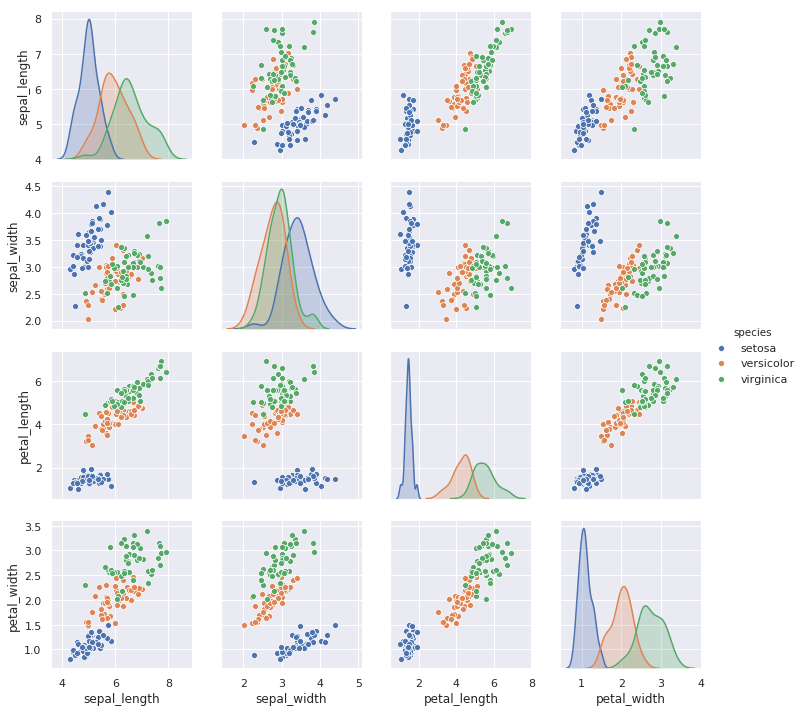

In [3]:
# Scatter plot of the dataset
sns.pairplot(iris_dna,hue="species")
plt.show()

### Data distribution

Text(0.5, 0.98, 'Analyzing distribution for the series')

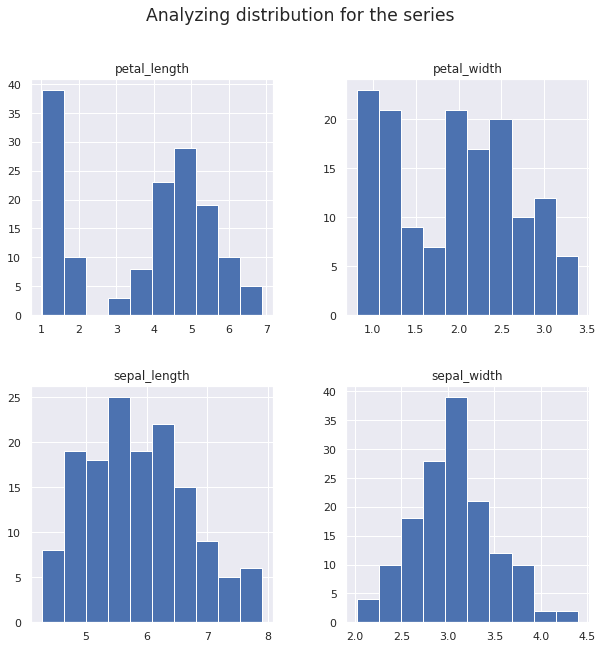

In [4]:
iris_dna.hist(
    column=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"],
    figsize=(10, 10)
    #,sharey=True, sharex=True
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")

It seems that petal length and petal width diverge from the normal distribution.
To investigate this feature, we'll study the correlation between variables.

# Correlation between variables

We investigate the correlation between sepal and petal with respect to length and width.
The linear correlation coefficients are computed first with the pearsonr Python module and also by hand with formula.

In [5]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

In [6]:
# Linear correlation coefficients
ccl1 = st.pearsonr(iris_dna["petal_width"],iris_dna["petal_length"])[0]
print("Linear correlation coefficient (petal_width,petal_length):", ccl1)
ccl2 = st.pearsonr(iris_dna["sepal_width"],iris_dna["petal_width"])[0]
print("Linear correlation coefficient (sepal_width,petal_width):", ccl2)

# Pearson correlation coefficient by hand
def r_pearson(X,Y):
    S_XY = (1/len(X))*(sum((X-np.mean(X))*(Y-np.mean(Y))))
    S_X = np.sqrt((1/len(X))*(sum((X-np.mean(X))**2)))
    S_Y = np.sqrt((1/len(Y))*(sum((Y-np.mean(Y))**2)))
    return (S_XY/(S_X*S_Y))

print('\nPearson correlation coefficient (petal_width,petal_length): %.3f' \
%r_pearson(iris_dna['petal_width'].values,iris_dna['petal_length'].values ))
print('Pearson correlation coefficient (sepal_width,petal_width): %.3f' \
%r_pearson(iris_dna['sepal_width'].values,iris_dna['petal_width'].values ))

# Correlation coefficient with Python module
iris_dna.corr()

Linear correlation coefficient (petal_width,petal_length): 0.9418817573025173
Linear correlation coefficient (sepal_width,petal_width): -0.24797130615784596

Pearson correlation coefficient (petal_width,petal_length): 0.942
Pearson correlation coefficient (sepal_width,petal_width): -0.248


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.125099,0.871253,0.839440
sepal_width,-0.125099,1.000000,-0.440537,-0.247971
petal_length,0.871253,-0.440537,1.000000,0.941882
petal_width,0.839440,-0.247971,0.941882,1.000000


### Results interpretation

The correlation coefficient of petal_width as a function of petal_length is close to 1.0, as we see on the corresponding scatter plot the distribution is almost linear. 
Thus, the variables are correlated.
On the other hand, the correlation coefficient of sepal_width as a function of petal_width is closer to zero, as we can see on the corresponding scatter plot, no linear relationship clearly appears and the variables are not really correlated.

According to Simpson's Paradox, separating the species might yield different results. Indeed, there is a confounding factor that plays on both the "cause" and the "consequence" of the phenomenon being studied.

Determinate the correlation coefficients of these same variables (sepal_width,petal_width) but by separating the species, lead to positive correlation coefficients.<br>
Linear correlation coefficient (sepal_width,petal_width):<br>
sepal_width with respect to petal_width on iris_setosa : 0.753<br>
sepal_width with respect to petal_width on iris_virginica : 0.685<br>
sepal_width with respect to petal_width on iris_versicolor : 0.825<br>

<img src="images/index.png">

Comparing with the colored graph (sepal_width, petal_width), we see that the greater the correlation coefficient (> 0) the greater the slope of the linear regression line is, which is quite consistent.

# Linear regression

We perform a linear regression with the least squares method: Y = aX + b + epsilon, where a and b are real to be estimated, epsilon the error term.<br>
The linear regressions correspond to the following cases:
* case n°1: <br>
X is the variable petal_length and Y is the variable petal_width, on the dataframe iris_dna.
* case n°2: <br>
X is the variable petal_width and Y is the variable sepal_width, on the dataframe iris_setosa.
* case n°3: <br>
X is the variable petal_width and Y is the variable sepal_width, on the dataframe iris_virginica.
* case n°4: <br>
X is the variable petal_width and Y is the variable sepal_width, on the dataframe iris_versicolor.

In [7]:
# Linear regression
def reg_lin(df, feat1, feat2):
    """
        Perform linear regression by Ordinary Least Squares model.
        
        Args:
            * df: DataFrame (species)
            * feat1: string (feature)
            * feat2: string (feature)
        Return:
            * a, b regression coefficients
        
    """
    featx = feat1
    X = df[featx]
    Y = df[feat2]
    X = X.copy()
      
    X = sm.add_constant(X)
    # Ordinary Least Squares model
    result = sm.OLS(Y,X).fit()
    a, b = result.params[featx], result.params['const']
    #print(result.summary())
    return a, b


# visualisation 
def viz_reg(df, feat1, feat2):
    """
        Plot the dispersion diagramme and the linear regression line.
    
        Args:
            * df: DataFrame (species)
            * feat1: string (feature)
            * feat2: string (feature)
        Result:
            * plot
    
    """
    a=reg_lin(df, feat1, feat2)[0]
    b=reg_lin(df, feat1, feat2)[1]
    plt.scatter(df[feat1].values, df[feat2].values, marker="+")
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    m = min(df[feat1])
    M = max(df[feat1])
    plt.plot([m,M], [a*m+b, a*M+b], 'r--')
    plt.show()

Case n°1: iris_dna with X=petal_length and Y=petal_width 
a = 0.386 and b = 0.509 



/home/christelle/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


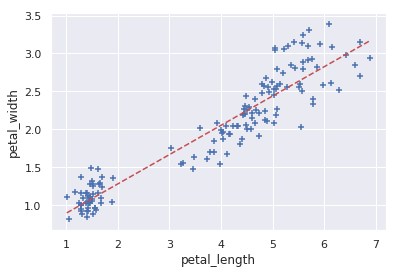

Case n°2: iris_setosa with X=petal_width and Y=sepal_width 
a = 1.788 and b = 1.459 



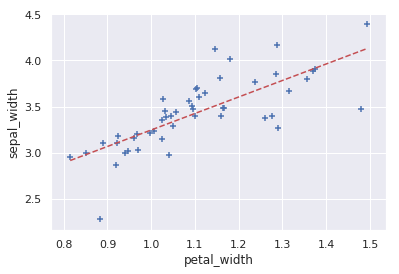

Case n°3: iris_virginica with X=petal_width and Y=sepal_width 
a = 0.699 and b = 1.038 



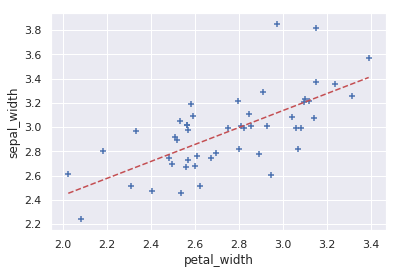

Case n°4: iris_versicolor with X=petal_width and Y=sepal_width 
a = 0.974 and b = 0.809 



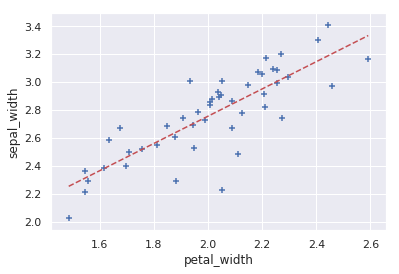

In [8]:
res_reg=[]
for c, df, df_name, x, y in \
zip([x for x in range(1,5)],
    [iris_dna, iris_setosa, iris_virginica, iris_versicolor],
    ['iris_dna', 'iris_setosa', 'iris_virginica', 'iris_versicolor'],
    ['petal_length', 'petal_width', 'petal_width', 'petal_width'],
    ['petal_width', 'sepal_width', 'sepal_width', 'sepal_width']):
    print('\033[1mCase n°%i: %s with X=%s and Y=%s \033[0m' %(c, df_name, x, y))
    print('a = %.3f and b = %.3f \n' 
          %(reg_lin(df,x,y)[0], reg_lin(df,x,y)[1]))
    res_reg.append(reg_lin(df,x,y))
    viz_reg(df,x,y)

# Prediction

We observe that for each species there is a missing value.
Missing data:

<img src="images/tab.png">

These missing values can be approached by the linear regression achieved below.

In [9]:
coeffs = {
    "case n°1" : {'a': res_reg[0][0] , 'b':res_reg[0][1]}, 
    "case n°2" : {'a': res_reg[1][0] , 'b':res_reg[1][1]}, 
    "case n°3" : {'a': res_reg[2][0] , 'b':res_reg[2][1]}, 
    "case n°4" : {'a': res_reg[3][0] , 'b':res_reg[3][1]}, 
}
lignes_modifiees = []

for (i,individu) in iris.iterrows():
    if pd.isnull(individu["petal_width"]): 
        a = coeffs["case n°1"]['a']
        b = coeffs["case n°1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y 
        lignes_modifiees.append(i)
        print("petal_width approximated by {} \n    (from petal_length = {})\n".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        X = individu["petal_width"]
        cas = "case n°2" if espece == 'setosa' else ("case n°3" if espece == 'virginica' else "case n°4")
        a = coeffs[cas]['a']
        b = coeffs[cas]['b']
        Y = a*X + b 
        iris.loc[i, "sepal_width"] = Y 
        lignes_modifiees.append(i)
        print("sepal_width approximated by {} \n    (from the specie {} and petal_width = {})\n".format(Y,espece,X))

sepal_width approximated by 3.251018116408285 
    (from the specie setosa and petal_width = 1.0023435676326218)

petal_width approximated by 2.063990474674413 
    (from petal_length = 4.027837977207209)

sepal_width approximated by 3.009714075281929 
    (from the specie versicolor and petal_width = 2.259954321281721)

sepal_width approximated by 3.3605641964807065 
    (from the specie virginica and petal_width = 3.3218723995908728)

